# File and Data Field Descriptions

* **df.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as dfing data.
    * ***PassengerId*** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * ***HomePlanet*** - The planet the passenger departed from, typically their planet of permanent residence.
    * ***CryoSleep*** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * ***Cabin*** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * ***Destination*** - The planet the passenger will be debarking to.
    * ***Age*** - The age of the passenger.
    * ***VIP*** - Whether the passenger has paid for special VIP service during the voyage.
    * ***RoomService***, ***FoodCourt***, ***ShoppingMall***, ***Spa***, ***VRDeck*** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * ***Name*** - The first and last names of the passenger.
    * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. * Your task is to predict the value of Transported for the passengers in this set.

## Importação dos pacotes e bases

In [1]:
# Importação das bibliotecas para manipulação de dados
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Importação das bibliotecas para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Importando as bases
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Faz a união de treino e teste
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

c:\Users\BlueShift\OneDrive\Facens\Introdução à Inteligência Artificial\Trabalho - Kaggle\venvKaggle\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\BlueShift\AppData\Local\Temp\ipykernel_5804\2449045842.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Visualização dos 10 primeiros
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


## Análise Exploratória Automática com Pandas Profiling

In [3]:
# Gera um arquivo html com a análise exploratória automática
#profile = ProfileReport(df)
#profile.to_file("EDA_antes.html")

# Remoção de Outliers

Esta etapa serve para a remoção de dados que estejam com valores numéricos muito altos e possam influenciar o modelo.

In [4]:
# Função para remoção de outliers com o método de Tukey
#def removeOutliers(df,cols):
#    Q1 = df[cols].quantile(0.25)
#    Q3 = df[cols].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
#    
#    # Cria uma máscara identificando
#    mask = pd.Series([True] * len(df))
#    for col in cols:
#        mask &= (df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])
#    return df[mask]

In [5]:
# Removendo Outliers
# train = removeOutliers(train, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

## Tratamento de valores nulos

Conforme vimos na EDA, praticamente todas as colunas possuem valores nulos, em média cada uma possui 200 valores faltantes.

Cada unidade percentual conta para subir no ranking de acurária do desafio, e esta diferença pode estar no acerto do preenchimento dos valores nulos.

Temos as seguintes colunas para tratar:

* HomePlanet
* CryoSleep
* Cabin
* Destination
* Age
* VIP
* RoomService
* FoodCourt
* ShoppingMall
* Spa
* VRDeck
* Name

### Estratégia para preenchimento de HomePlanet, Destination e VIP:

Considerando que temos planetas diferentes para a origem dos passageiros, uma hipótese que podemos utilizar é com relação aos sobrenomes. Se considerarmos que cada planeta possui os sobrenomes nativos, podemos utilizar os sobrenomes dos outros tripulantes e pegar os respectivos valores de HomePlanet.
O mesmo vale para a coluna de VIPs. Uma vez que a própria descrição do desafio nos diz que podem haver familiares, talvez o sobrenome possa indicar uma relação de parentes com acesso VIP ou não.

In [6]:
# Adicionando colunas para Primeiro nome e Sobrenome
df['LastName'] = df['Name'].str.split(' ').str[1]
df['FirstName'] = df['Name'].str.split(' ').str[0]

# Verificando se faz sentido a estratégia
HPmissing = df.groupby(['LastName', 'HomePlanet']).size().unstack(level=-1, fill_value=0)
result = pd.DataFrame({
    'LastName': HPmissing.index,
    'Europa': HPmissing['Europa'],
    'Earth': HPmissing['Earth'],
    'Mars': HPmissing['Mars']
})

# Visualização das 10 primeiras linhas
pd.set_option('display.max_rows', None)
result.head(10)

# Verificar se há algum sobrenome que pertence a mais de um planeta
condicao = ((result['Europa'] > 0) & (result['Earth'] > 0)) | ((result['Earth'] > 0) & (result['Mars'] > 0)) | ((result['Europa'] > 0) & (result['Mars'] > 0))
result[condicao].head(10)

# Pelo fato de ter somente 10 linhas onde um mesmo sobrenome aparece em mais de um planeta, representando 0,1% das linhas,  A estratégia será utilizada

# Substituindo HomePlanet nulos com base no nome sobrenome
df.loc[df['HomePlanet'].isnull(), 'HomePlanet'] = df.groupby('LastName')['HomePlanet'].ffill()
df.loc[df['HomePlanet'].isnull(), 'HomePlanet'] = df.groupby('FirstName')['HomePlanet'].ffill()

# Substituindo VIP nulos com base no sobrenome
df.loc[df['VIP'].isnull(), 'VIP'] = df.groupby('LastName')['VIP'].ffill()

Colunas que faltam tratar:

* CryoSleep
* Cabin
* Destination
* Age
* RoomService
* FoodCourt
* ShoppingMall
* Spa
* VRDeck
* Name

### Estratégia para preenchimento de RoomService, FoodCourt, ShoppingMall, Spa e VRDeck:

Pela lógica, se CryoSleep quer dizer que o passageiro vai viajar "congelado", não faz sentido que ele gaste com alguma mordomia, portanto, vamos criar uma coluna com a soma dos gastos e utilizar ela para preencher alguns valores nulos de CryoSleep. Esta etapa é importante pois CryoSleep é a coluna com maior correlação com a variável target.

Não é possível dizer que todos que gastaram 0 são CryoSleep Verdadeiro, mas com certeza quem teve gasto maior que 0 é CryoSleep Falso.

<AxesSubplot: xlabel='CryoSleep', ylabel='TotalService'>

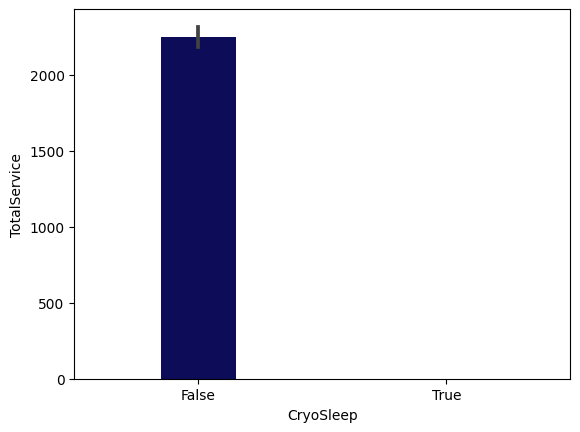

In [7]:
# Preenchendo os valores nulos dos gastos com mordomias com 0
df['RoomService'].fillna(df['RoomService'].median(), inplace = True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace = True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace = True)
df['Spa'].fillna(df['Spa'].median(), inplace = True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace = True)

# Criando coluna com total de gastos com mordomias
df['TotalService'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

# Fillna somente se TotalService for igual a 0
CSCondition = df['TotalService'] > 0
df.loc[CSCondition, 'CryoSleep'] = df.loc[CSCondition, 'CryoSleep'].fillna(False)

# Verifica o CryoSleep com TotalService
sns.barplot(x="CryoSleep", y="TotalService", data=df, width=0.3, palette = ['#000064', '#0FD3E8'])

Text(0.5, 1.0, 'Influência de CryoSleep na variável target Transported')

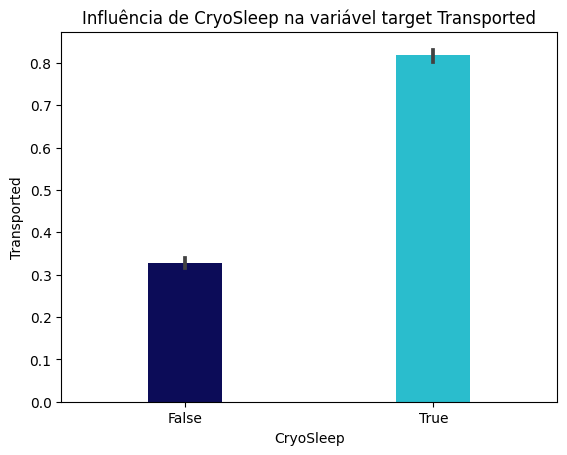

In [8]:
# Verifica o CryoSleep com a variável target
sns.barplot(x="CryoSleep", y="Transported", data=df, width=0.3, palette = ['#000064', '#0FD3E8'])
plt.title('Influência de CryoSleep na variável target Transported')


Colunas que faltam tratar:

* CryoSleep
* Cabin
* Destination
* Age
* Name

### Estratégia para preenchimento de Name (e derivados) e Cabin:

Com a coluna de Nome não há muito o que fazer, então substituiremos simplesmente com "Unknown"

In [9]:
# Preenchendo os valoress de nome com 'Unknown'
fill_values = {'Name': 'Unknown', 
               'FirstName': 'Unknown', 
               'LastName': 'Unknown',
               'Cabin': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

Colunas que faltam tratar:

* CryoSleep
* Destination
* Age

### Estratégia para preenchimento de Age:

A estratégia utilizada neste caso vai ser escolher a idade randomicamente entre o valor da média - desvio padrão e média + desvio padrão.

Os valores de idade 0 não serão mexidos, pois há uma significativa concentração de transportados com idade 0, então ficará desta forma.

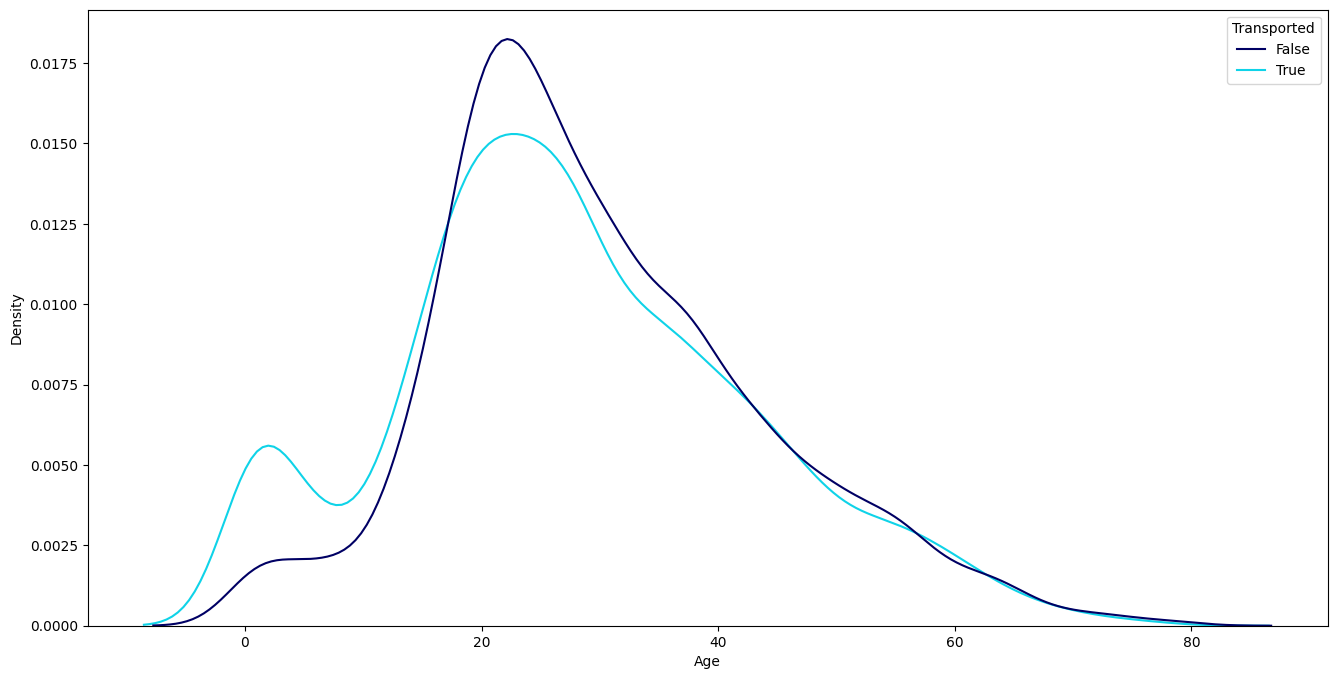

In [10]:
# Verificando se a idade teve influência com a variável target
fig, ax = plt.subplots(figsize=(16, 8))
sns.kdeplot(data=df, x='Age', palette = ['#000064', '#0FD3E8'], hue="Transported", ax=ax);

Text(0.5, 1.0, 'Influência de idade 0 na variável target')

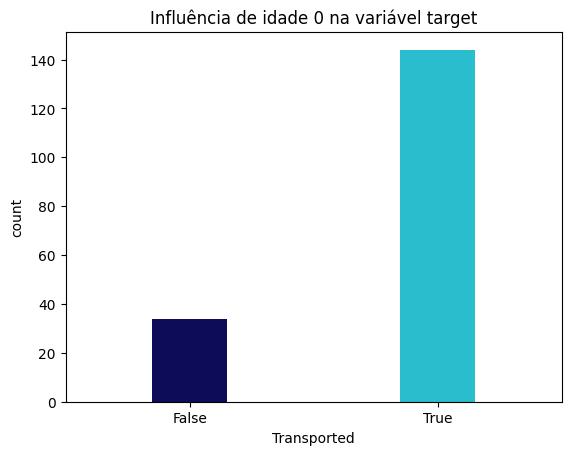

In [11]:
# Preenchimento dos nulos na coluna de idade

# Pega o valor da média de idade
age_mean = df['Age'].mean()

# Pega o valor do desvio padrão
age_std = df['Age'].std()

# Faz a contagem dos nulos
age_nulls_count = df['Age'].isnull().sum()

# Substitui os nulos aleatoriamente entre média e desvio padrão
df.loc[df['Age'].isnull(), 'Age'] = np.random.randint(age_mean - age_std, age_mean + age_std, age_nulls_count)

# Visualizando a idade 0
Age0Count = df[df['Age'] == 0]
sns.countplot(data=Age0Count, x='Transported', width=0.3, palette = ['#000064', '#0FD3E8'])
plt.title('Influência de idade 0 na variável target')

### Estratégia para preenchimento de Destination e CryoSleep:

A estratégia utilizada neste caso vai ser escolher randomicamente entre os valores distintos da própria coluna mantendo a proporção.

*Um detalhe importante é que a técnica utilizada em Home Planet e VIP não preencheram 100% dos nulos, então vamos aplicar o preenchimento randômico para estas colunas também*

In [12]:
# Criação da função para preencher nulos randomicamente
def fill_nulls_randomly(column, df):
    # Pega os valores distintos
    value_counts = df[column].value_counts()
    values = value_counts.index.to_numpy()
    
    # Faz contagem do total de valores
    counts = value_counts.to_numpy()

    # Calcula a proporção de cada item
    probabilities = counts / counts.sum()

    # Faz a substituição dos nulos
    null_mask = df[column].isnull()
    num_nulls = null_mask.sum()
    random_values = np.random.choice(values, size=num_nulls, p=probabilities)
    df.loc[null_mask, column] = random_values

# Aplica a função para as colunas desejadas
fill_nulls_randomly('HomePlanet', df)
fill_nulls_randomly('CryoSleep', df)
fill_nulls_randomly('Destination', df)
fill_nulls_randomly('VIP', df)

## Análise Exploratória Automática com Pandas Profiling (Depois)

In [13]:
# Gerando novo arquivo para comparar
#profile = ProfileReport(df)
#profile.to_file("EDA_depois.html")

# Visualização da variável target com as outras variáveis

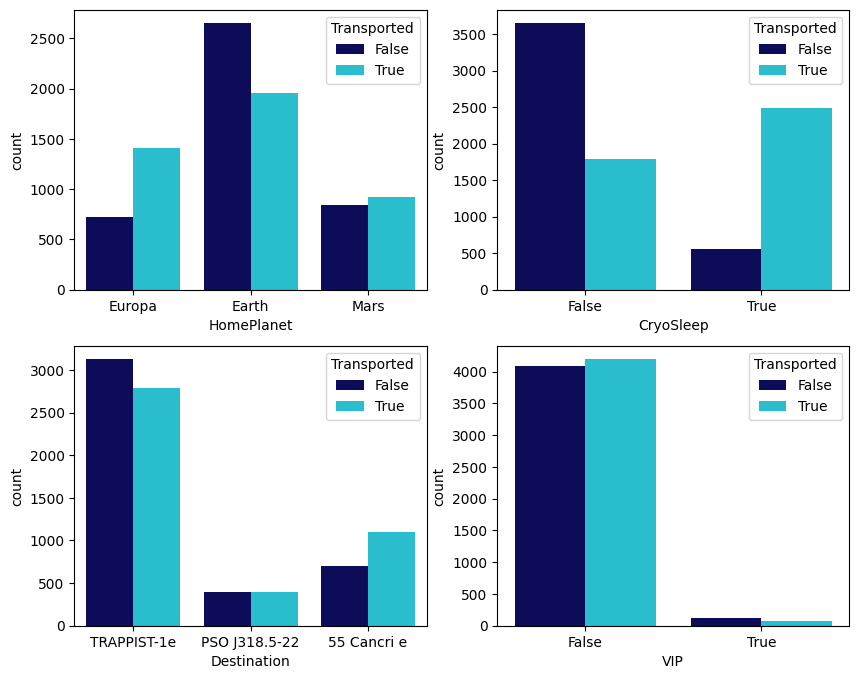

In [14]:
# Criando plots para ver o comportamento da targt com outras variáveis
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(data=train, x='HomePlanet', hue="Transported", ax=axes[0][0], palette = ['#000064', '#0FD3E8']);
sns.countplot(data=train, x='CryoSleep', hue="Transported", ax=axes[0][1], palette = ['#000064', '#0FD3E8']);
sns.countplot(data=train, x='Destination', hue="Transported", ax=axes[1][0], palette = ['#000064', '#0FD3E8']);
sns.countplot(data=train, x='VIP', hue="Transported", ax=axes[1][1], palette = ['#000064', '#0FD3E8']);

# Feature Engineering (Engenharia de Atributos)

Esta é a etapa onde usamos a criatividade para criar novas colunas e encontrar alguma combinação que nos traga uma maior correlação com a nossa variável target. Por enquanto faremos várias novas colunas e depois podemos filtrar quais iremos utilizar ou não.

A descrição do desafio nos mostra que a construção do ID é composta por um grupo de quatro dígitos e um subgrupo, então talvez podemos encontrar alguma relação destes valores com o target. Além disso, temos três informações para os valores da cabine, e isso também pode indicar algo.

In [15]:
# Separando a coluna de cabine em Deck, Numero e Lado
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Separando a coluna de ID em Grupo e Subgrupo 
df[['IDGroup', 'IDSubgroup']] = df['PassengerId'].str.split('_', expand=True)
df['IDGroup'] = df['IDGroup'].astype('int64')
df['IDSubgroup'] = df['IDSubgroup'].astype('int64')

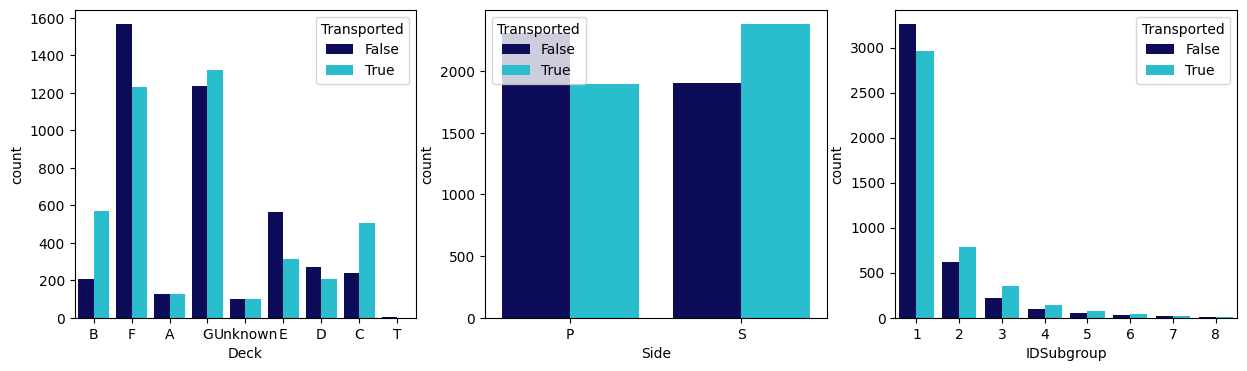

In [16]:
# Criando plots para ver o comportamento da target com as novas variáveis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(data=df, x='Deck', hue="Transported", ax=axes[0], palette = ['#000064', '#0FD3E8']);
sns.countplot(data=df, x='Side', hue="Transported", ax=axes[1], palette = ['#000064', '#0FD3E8']);
sns.countplot(data=df, x='IDSubgroup', hue="Transported", ax=axes[2], palette = ['#000064', '#0FD3E8']);

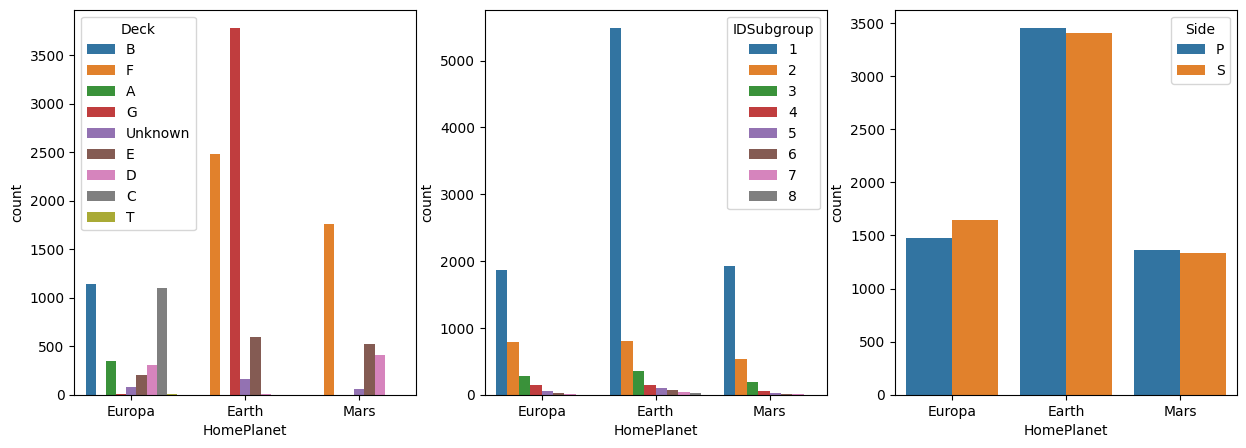

In [17]:
# Criando plots para ver o comportamento das variáveis criadas com algumas existentes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='HomePlanet', hue="Deck", ax=axes[0]);
sns.countplot(data=df, x='HomePlanet', hue="IDSubgroup", ax=axes[1]);
sns.countplot(data=df, x='HomePlanet', hue="Side", ax=axes[2]);

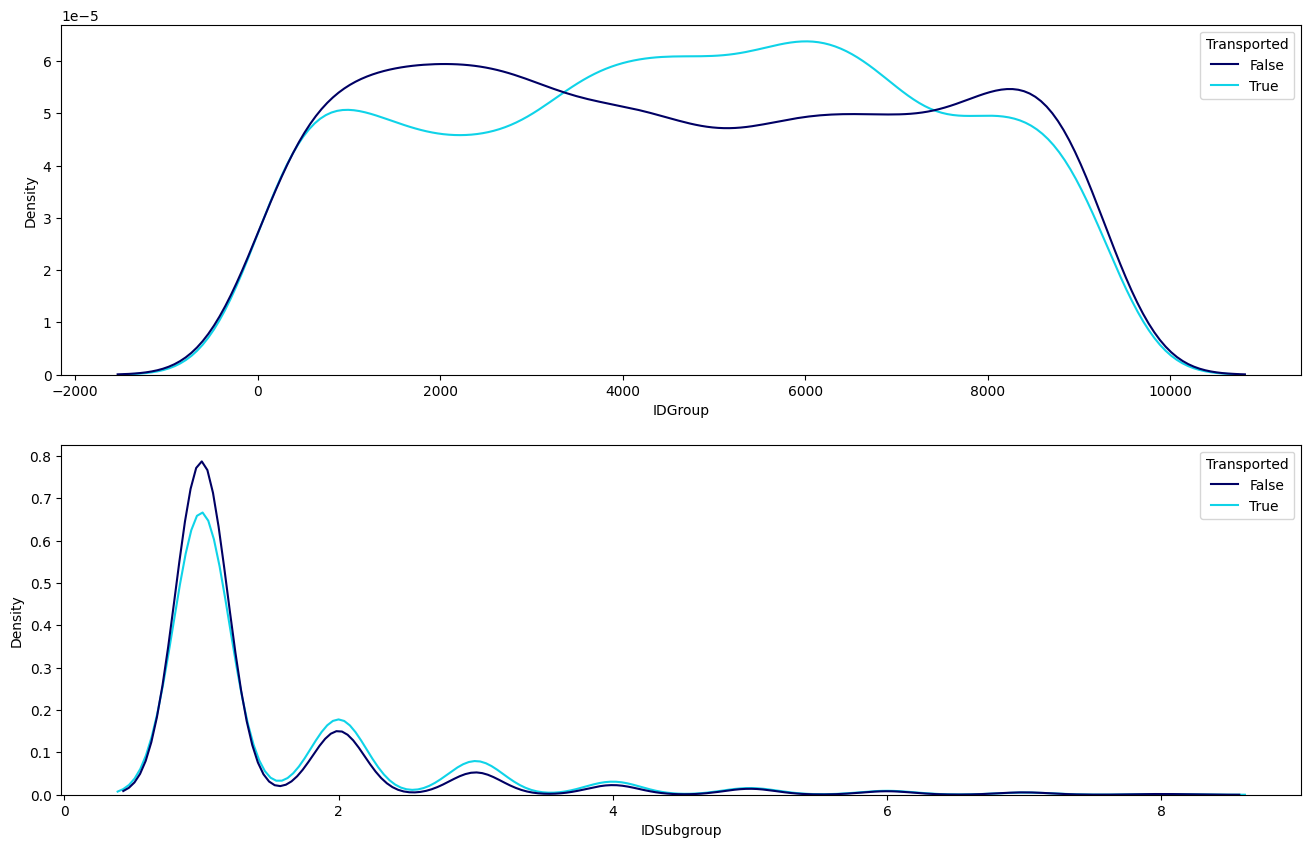

In [18]:
# Verificando a influência de IDGroup e IDSubgroup com a variável target
fig, axes = plt.subplots(2, figsize=(16, 10))
sns.kdeplot(data=df, x='IDGroup', hue="Transported", ax=axes[0], palette = ['#000064', '#0FD3E8']);
sns.kdeplot(data=df, x='IDSubgroup', hue="Transported", ax=axes[1], palette = ['#000064', '#0FD3E8']);

# Machine Learning

Antes de aplicar os modelos em si, temos que transformar as variáveis categóricas em numéricas para que os modelos consigam ralizar o processo corretamente. Além disso é preciso aplicar também a normalização (ou outra técnica de escalar valores) para diminuir a disparidade de algumas variáveis (como TotalService).

In [19]:
# Eliminando colunas que não serão mais usadas
ML_df = df.drop(['PassengerId', 'Cabin', 'Name', 'FirstName', 'LastName', 'IDGroup', 'Num'], axis=1)

# Adicionando novas colunas
ML_df['HasPaid'] = (ML_df['RoomService'] + ML_df['FoodCourt'] + ML_df['ShoppingMall'] + ML_df['Spa'] + ML_df['VRDeck']) > 0
ML_df['Paid'] = ML_df['RoomService'] + ML_df['FoodCourt'] + ML_df['ShoppingMall'] + ML_df['Spa'] + ML_df['VRDeck']
ML_df['HasPaid_RoomService'] = (ML_df['RoomService']) > 0
ML_df['HasPaid_FoodCourt'] = (ML_df['FoodCourt']) > 0
ML_df['HasPaid_ShoppingMall'] = (ML_df['ShoppingMall']) > 0
ML_df['HasPaid_Spa'] = (ML_df['Spa']) > 0
ML_df['HasPaid_VRDeck'] = (ML_df['VRDeck']) > 0

# Convertendo para o valor 1
ML_df['HasPaid'] = ML_df['HasPaid'].astype(int)
ML_df['HasPaid_RoomService'] = ML_df['HasPaid_RoomService'].astype(int)
ML_df['HasPaid_FoodCourt'] = ML_df['HasPaid_FoodCourt'].astype(int)
ML_df['HasPaid_ShoppingMall'] = ML_df['HasPaid_ShoppingMall'].astype(int)
ML_df['HasPaid_Spa'] = ML_df['HasPaid_Spa'].astype(int)
ML_df['HasPaid_VRDeck'] = ML_df['HasPaid_VRDeck'].astype(int)
ML_df['CryoSleep'] = ML_df['CryoSleep'].map( {False: 0, True: 1} ).astype(int)
ML_df['VIP'] = ML_df['VIP'].map( {False: 0, True: 1} ).astype(int)

# Criando variáveis dummies
ML_df = pd.get_dummies(ML_df, columns = ['HomePlanet'], prefix="P")
ML_df = pd.get_dummies(ML_df, columns = ['Destination'], prefix="D")
ML_df = pd.get_dummies(ML_df, columns = ['Deck'], prefix="Deck")
ML_df = pd.get_dummies(ML_df, columns = ['Side'], prefix="Side")

# Refinando o dataset
ML_df = ML_df.drop(['Deck_Unknown', 'P_Mars', 'D_TRAPPIST-1e', 'Side_S'], axis=1)

# Normalização da coluna TotalService
ML_df['RoomService'] = MinMaxScaler().fit_transform(ML_df[['RoomService']])
ML_df['FoodCourt'] = MinMaxScaler().fit_transform(ML_df[['FoodCourt']])
ML_df['ShoppingMall'] = MinMaxScaler().fit_transform(ML_df[['ShoppingMall']])
ML_df['Spa'] = MinMaxScaler().fit_transform(ML_df[['Spa']])
ML_df['VRDeck'] = MinMaxScaler().fit_transform(ML_df[['VRDeck']])
ML_df['TotalService'] = MinMaxScaler().fit_transform(ML_df[['TotalService']])

# Visualização das 5 primeiras linhas
ML_df.head(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalService,...,D_PSO J318.5-22,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,...,0,0,1,0,0,0,0,0,0,1
1,0,24.0,0,0.007608,0.000302,0.001064,0.024500,0.001823,True,0.020452,...,0,0,0,0,0,0,1,0,0,0
2,0,58.0,1,0.003001,0.119948,0.000000,0.299670,0.002030,False,0.288521,...,0,1,0,0,0,0,0,0,0,0
3,0,33.0,0,0.000000,0.043035,0.015793,0.148563,0.007997,False,0.143830,...,0,1,0,0,0,0,0,0,0,0
4,0,16.0,0,0.021149,0.002348,0.006428,0.025214,0.000083,True,0.030317,...,0,0,0,0,0,0,1,0,0,0


In [20]:
# Separando novamente em treino e teste
splitdf_train, splitdf_test = ML_df.loc[ML_df['Transported'].notnull()], ML_df.loc[ML_df['Transported'].isnull()]

# Split the data into train and test sets, using 30% for testing
x_train, x_test, y_train, y_test = train_test_split(splitdf_train.drop('Transported', axis=1), 
                                                    splitdf_train['Transported'], 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    shuffle=True)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

#Verificação da quantidade de linhas e colunas
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6085, 30), (6085,), (2608, 30), (2608,))

In [21]:
# Cria função que aplica vários modelos de uma vez baseado em um loop
    # Execução 1: Cria duas matrizes de confução para cada modelo, uma com valores brutos e outra com percentual
    # Retorno 1: Tabela com o nome do modelo e acurácia
    # Retorno 2: Valor do y_pred com a melhor acurácia

def applyML(models_dict, X_train, y_train, X_test, y_test):
    # Cria lista vazia para armazenar os resultados
    results = []
    best_y_pred = None
    best_acc = 0.0
    
    # Faz um loop em cada modelo do dicionário
    for name, model in models_dict.items():

        # Treina o modelo
        model.fit(X_train, y_train)

        # Arredonda os valores de acurácia
        accuracy = round(model.score(X_test, y_test)*100, 1)

        # Faz a predição com x_test
        y_pred = model.predict(X_test)

        # Estrutura para retornar a melhor previsão
        if accuracy > best_acc:
            best_model = model
            best_acc = accuracy

        # Adiciona os resultados para retornar a tabela
        results.append({
            'Model': name,
            'Accuracy': accuracy
        })

        # Gera a matriz de confusão
        cm = confusion_matrix(y_test, y_pred)

        # Gera a matriz de confusão (%)
        cm_percent = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Configura os subplots das matrizes
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 2.5))

        # Plota a matriz com quantidades
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axs[0])
        axs[0].set_title(f"Confusion matrix - {name} - Quantity")
        axs[0].set_xlabel("Predicted label")
        axs[0].set_ylabel("True label")

        # Plota a matriz com percentual
        sns.heatmap(cm_percent, annot=True, cmap="Greens", fmt=".2f", ax=axs[1])
        axs[1].set_title(f"Confusion matrix - {name} - Percentage")
        axs[1].set_xlabel("Predicted label")
        axs[1].set_ylabel("True label")
    
    # Cria um dataframe com o dicionário de resultados
    results_df = pd.DataFrame(results)
    
    # Retorna a tabela e a previsão com melhor acurácia
    return results_df, best_model

c:\Users\BlueShift\OneDrive\Facens\Introdução à Inteligência Artificial\Trabalho - Kaggle\venvKaggle\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\BlueShift\OneDrive\Facens\Introdução à Inteligência Artificial\Trabalho - Kaggle\venvKaggle\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model,Accuracy
0,LogRegression,74.0
1,SVC,73.7
2,LinearSVC,52.3
3,KNN,68.6
4,RandomForest,78.3
5,DecisionTree,74.1
6,NaiveBayes,73.9
7,Perceptron,72.9
8,SGDC,52.3


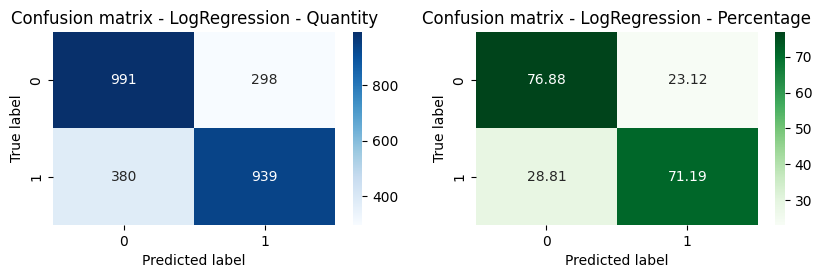

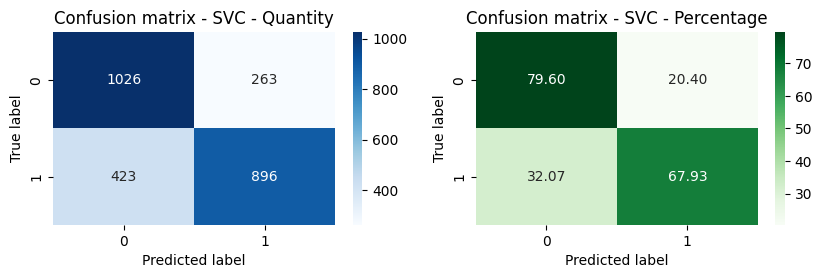

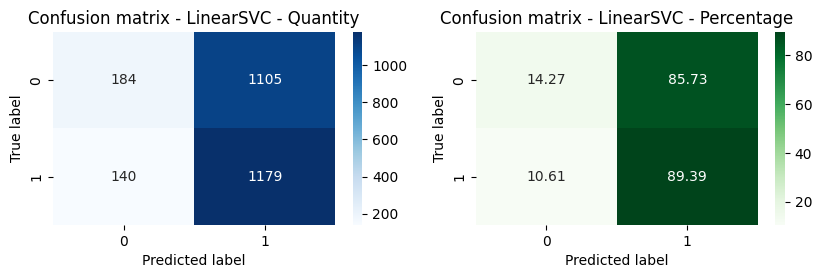

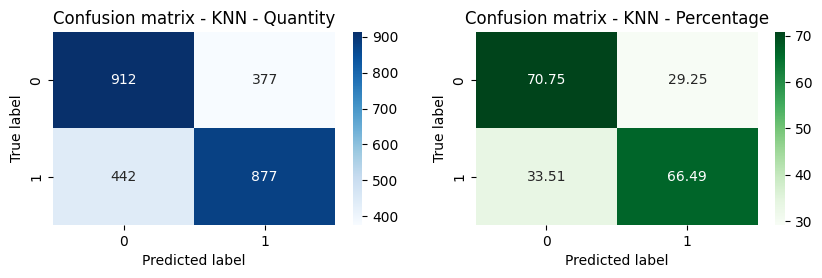

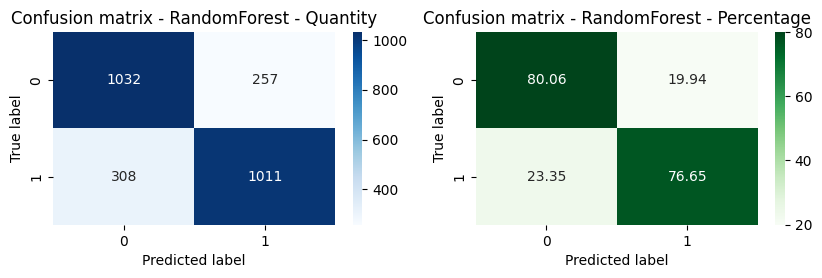

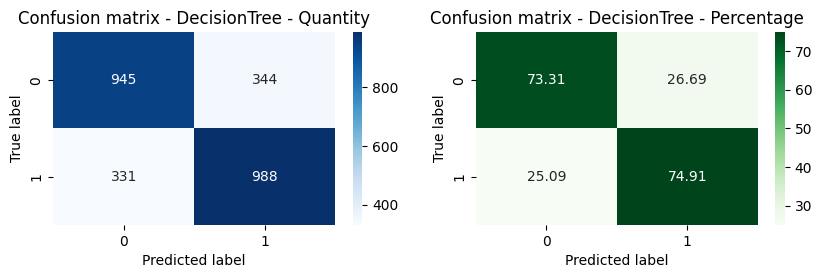

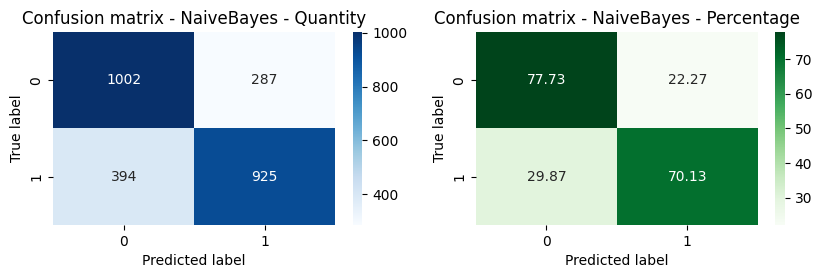

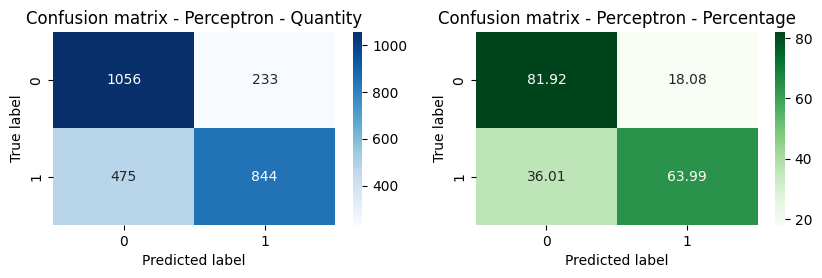

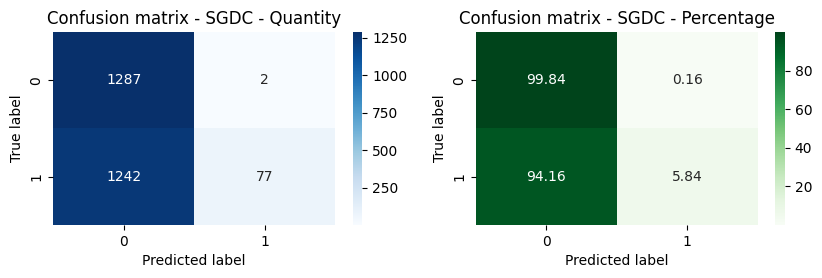

In [22]:
# Lista os modelos que serão comparados
models = {
    'LogRegression': LogisticRegression(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'KNN': KNeighborsClassifier(n_neighbors = 3),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'Perceptron': Perceptron(max_iter=5, tol=None),
    'SGDC': SGDClassifier(max_iter=5, tol=None)
}

# Resgata o dataframe com as acurácias e a previsão com melhor acurácia
result, best_model = applyML(models, x_train, y_train, x_test, y_test)

# Exibe a tabela
result

# Tunando o Modelo

A partir do modelo com melhor acurácia visto anteriormente, será realizada uma busca pelos melhores parâmetros, com a intenção de fazer a acurácia ser ainda maior. Para isso será utilizado o GridSearchCV, onde escolhemos uma lista de parâmetros e ele nos retornará o melhor.

In [23]:
# Esolha dos parâmetros a serem avaliados, total de 27 combinações
parameters = {
    "n_estimators": [30, 40, 50],
    "min_samples_leaf" : [3, 4, 5],
    "min_samples_split" : [3, 4, 5]
}

# Inicializa o objeto
RFC_Model = RandomForestClassifier()
# Aplica o GridSearchCV
RFC_grid = GridSearchCV(RFC_Model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs= -1)
# Treina o modelo
RFC_grid.fit(x_train, y_train)

# Retorna os melhores parâmetros
print('Best Parameters : ', RFC_grid.best_params_)
print()
print('Best Accuracy : ', RFC_grid.best_score_)

Best Parameters :  {'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}

Best Accuracy :  0.8050944946589975


In [79]:
# Após pego os melhores parâmetros, iremos aplicar
RFC = RandomForestClassifier(min_samples_leaf= 3, min_samples_split= 4, n_estimators= 46)
# Realiza o treino
RFC.fit(x_train,y_train)
# Prevê os valores
y_pred = RFC.predict(x_test)
# Arredonda os valores de acurácia
accuracy = round(RFC.score(x_test, y_test)*100, 1)
print(accuracy)

79.8


# Envio do arquivo Final

In [80]:
# Faz a predição com o modelo tunado
y_pred = RFC.predict(splitdf_test.drop('Transported', axis=1))
# Gera um dataframe com os valores de passageiro e a previsão com melhor acurácia
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred.astype(bool)
    })

# Gera o arquivo de submissão
submission.to_csv('sample_submission.csv', index=False)